In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from analyze_session_stats import analyze_session_stats

datasets = [
    'Resampled/BTCUSD_30m.csv',
    'Resampled/BTCUSD_1h.csv',
    'Resampled/BTCUSD_1d.csv'
]

titles = [
    '30-Minute',
    '1-Hour',
    '1-Day'
]

output_folder = 'Crypto-analysis/AnalysisResults'

# Analyze all
for i in range(len(datasets)):
    analyze_session_stats(datasets[i], titles[i], output_folder)



=== Session Movement and Volatility Stats (30-Minute) ===
                            range               ATR_14                 return  \
                             mean      max        mean          max      mean   
session                                                                         
Asia                   267.224686  7083.76  284.786632  2285.768571  1.696008   
Asia + London Overlap  227.476917  5484.10  260.315002  1809.335000 -3.657916   
London                 210.086837  8275.86  235.925434  1840.324286  1.689209   
London + NY Overlap    229.163504  4591.43  218.341540  1795.720000  3.074727   
New York               292.829629  6587.35  236.997191  2187.215000  1.308528   
Other                  300.402494  5306.71  296.749285  3014.570714  0.423920   

                                   abs_return             efficiency  
                              std        mean         std       mean  
session                                                              

In [2]:
%load_ext autoreload
%autoreload 2


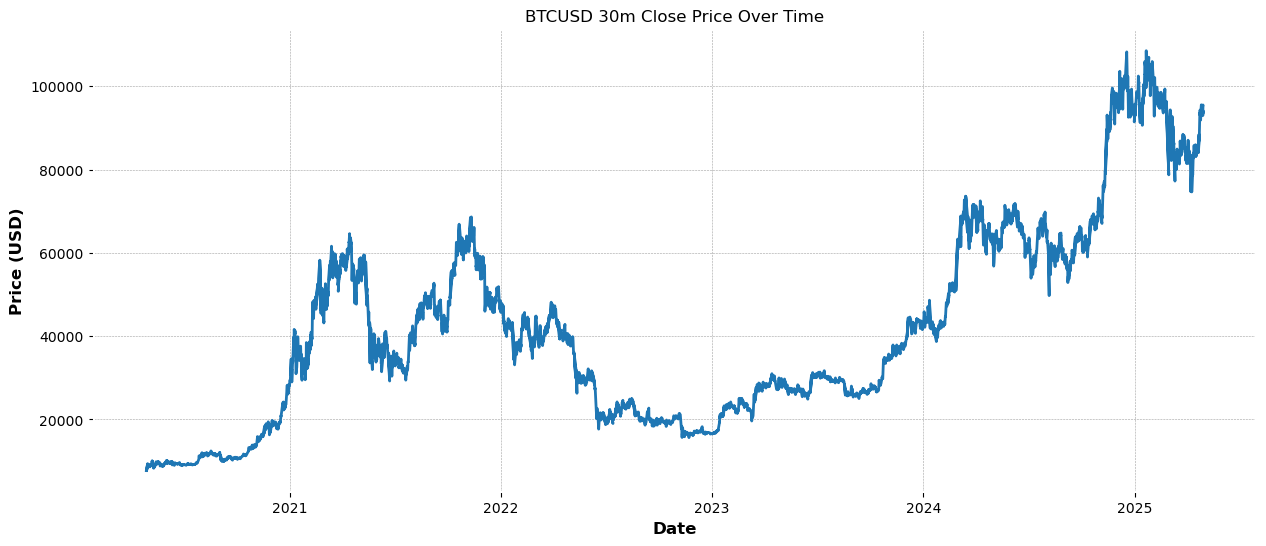

In [27]:
# Load your dataset
df = pd.read_csv('./Resampled/BTCUSD_30m.csv', index_col=0, parse_dates=True)

# Line chart
plt.figure(figsize=(15,6))
plt.plot(df.index, df['close'])
plt.title('BTCUSD 30m Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


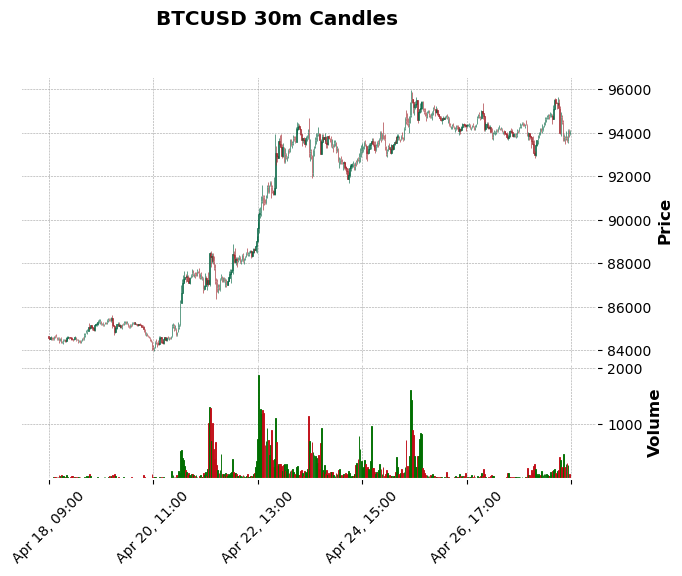

In [28]:
import mplfinance as mpf

# Load your dataset
df = pd.read_csv('./Resampled/BTCUSD_30m.csv', index_col=0, parse_dates=True)

# For mplfinance, dataframe must have columns: Open, High, Low, Close (capitalized)
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Plot candlestick chart
mpf.plot(df[-500:], type='candle', style='charles', title='BTCUSD 30m Candles', volume=True)


In [45]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


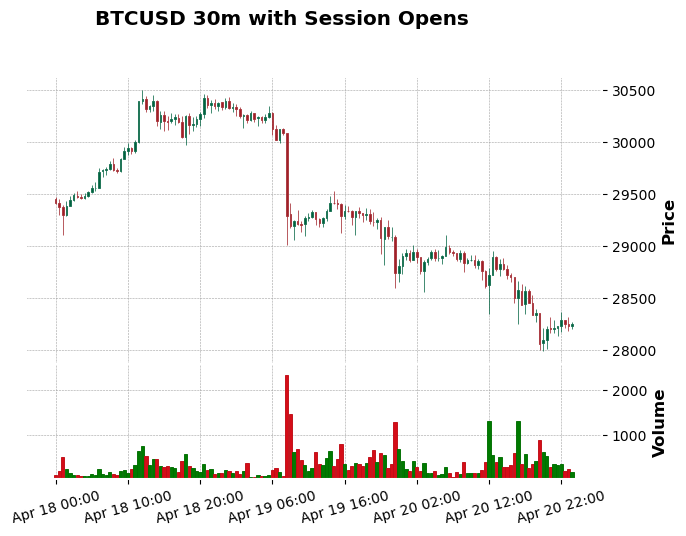

In [36]:
plot_candles(df, '2023-04-18 00:00', '2023-04-20 23:59', title="BTCUSD 30m with Session Opens")



=== Combined Session Movement and Volatility Stats ===
                        range_mean  range_max  ATR_14_mean   ATR_14_max  \
session                                                                   
Asia                    232.659434    8275.86   254.526839  1840.324286   
Asia + London Overlap   216.729907    2418.55   224.594006  1576.157857   
London                  237.794038    6587.35   220.578151  1917.249286   
London + NY Overlap     334.919418    5764.05   250.061313  2187.215000   
New York                300.402494    5306.71   296.749285  3014.570714   
Other                   263.320979    7083.76   291.696949  2285.768571   
Asia                    334.240223    8275.86   394.689749  3550.540000   
Asia + London Overlap   313.647185    3235.56   354.631348  2163.305714   
London                  341.435623    7442.23   340.669253  2291.030000   
London + NY Overlap     486.927490    7394.21   347.338429  2529.571429   
New York                430.333580    6783.3

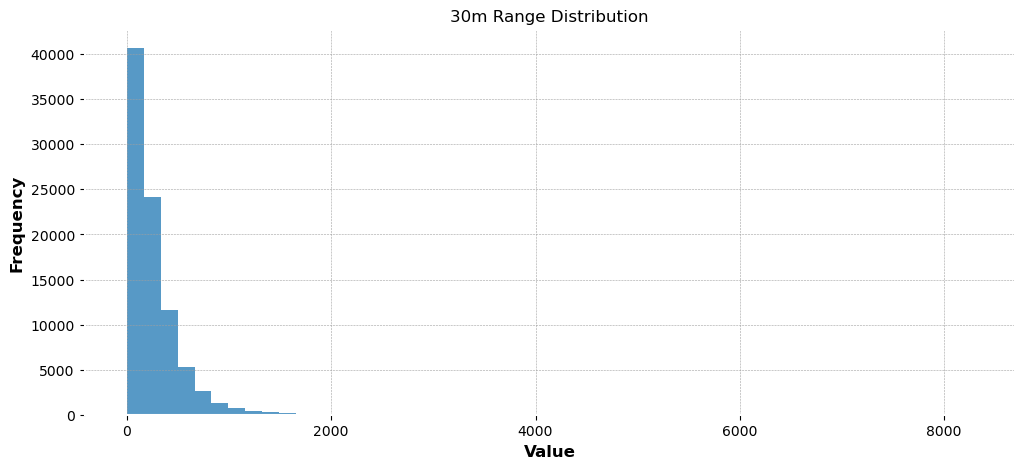

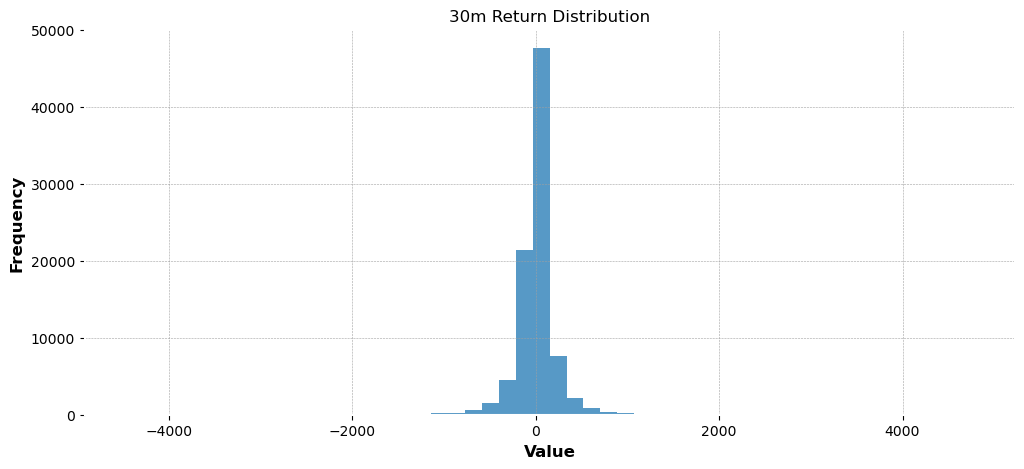

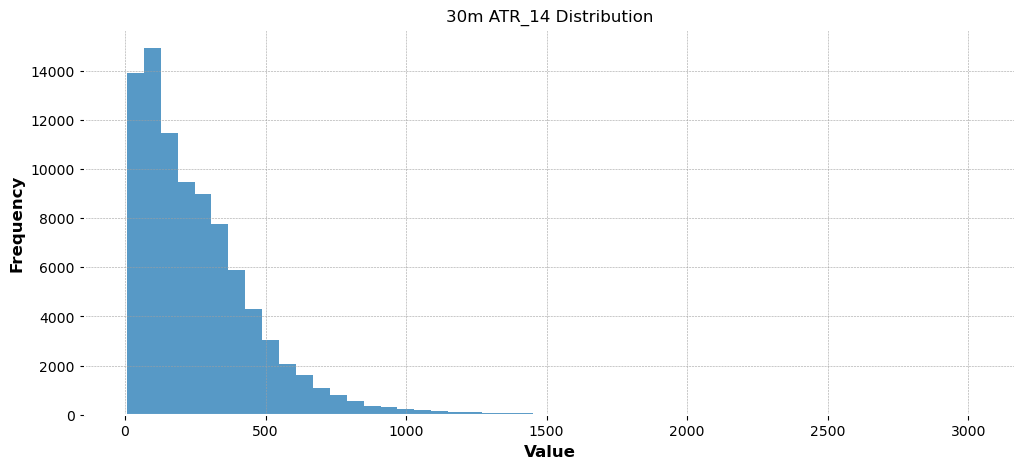

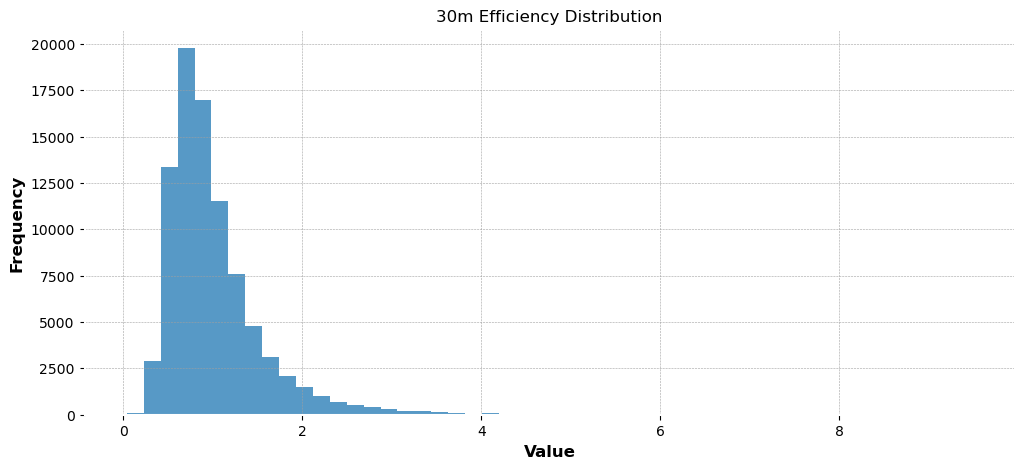

In [50]:
# main_runner.ipynb
import sys
sys.path.append('./')

# --- Setup Imports ---
import pandas as pd
from modules.timeframe_processor import process_timeframe
from visualization.plot_distributions import plot_distribution

# --- Process Each Timeframe ---
# Process all timeframes
df_30m, stats_30m = process_timeframe('./Resampled/BTCUSD_30m.csv', '30m')
df_1h, stats_1h = process_timeframe('./Resampled/BTCUSD_1h.csv', '1h')
df_1d, stats_1d = process_timeframe('./Resampled/BTCUSD_1d.csv', '1d')

# Combine all stats
all_stats = pd.concat([stats_30m, stats_1h, stats_1d])
all_stats.to_csv('./AnalysisResults/session_metrics_all_timeframes.csv')


# --- View Results ---
print("\n=== Combined Session Movement and Volatility Stats ===")
print(all_stats)

# --- Save Results ---
all_stats.to_csv('./AnalysisResults/session_metrics_all_timeframes.csv')
print("✅ Combined session stats saved to ./AnalysisResults/session_metrics_all_timeframes.csv")

# --- Plot Distributions (Optional) ---
# You can now plot for any df easily!
plot_distribution(df_30m['range'], '30m Range Distribution')
plot_distribution(df_30m['return'], '30m Return Distribution')
plot_distribution(df_30m['ATR_14'], '30m ATR_14 Distribution')
plot_distribution(df_30m['efficiency'], '30m Efficiency Distribution')

# Same thing can be done for 1h, 1d if needed


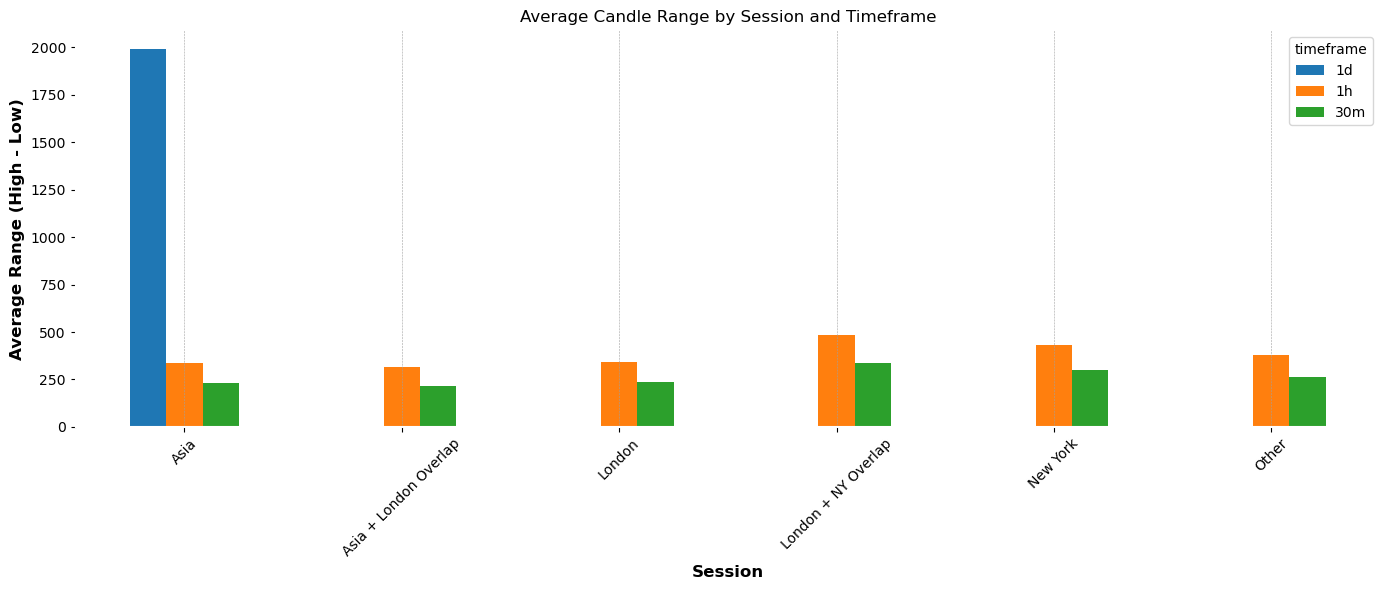

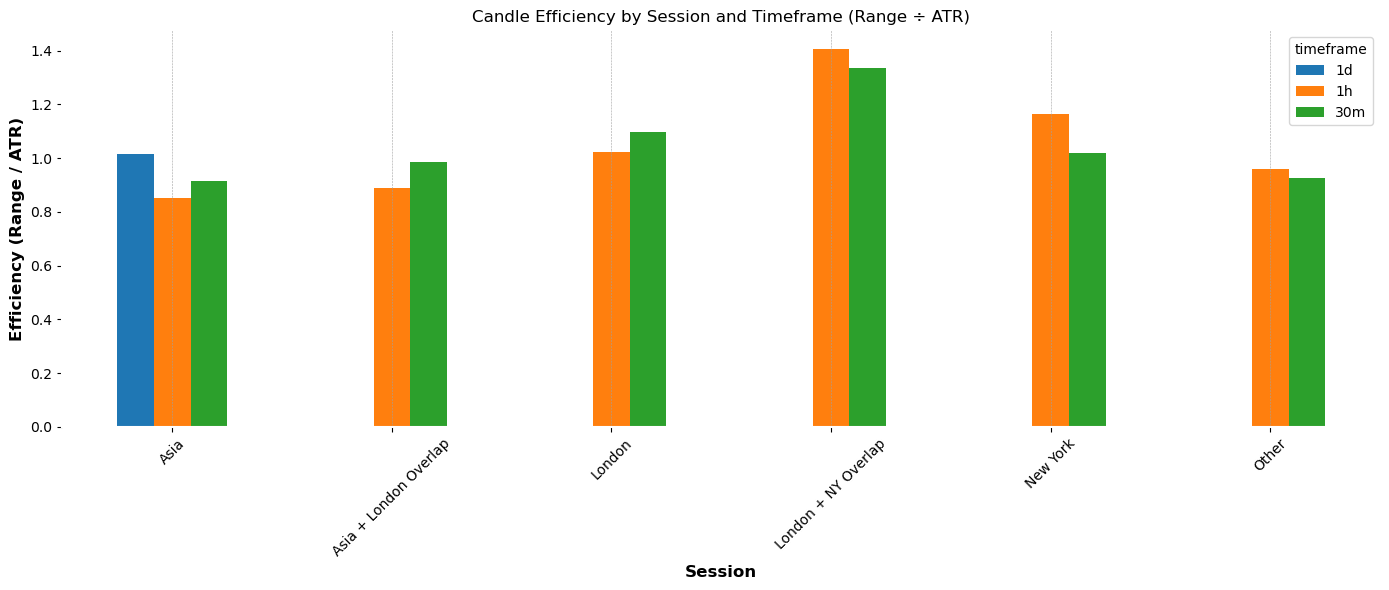

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the correct session metrics file
df = pd.read_csv('./AnalysisResults/session_metrics_all_timeframes.csv')  # ✅ Correct path

# Reset index and clean
df = df.reset_index(drop=True)
df = df.dropna(subset=['range_mean', 'efficiency_mean', 'timeframe', 'session'])

# --- Plot 1: Average Range ---
pivot_range = df.pivot(index='session', columns='timeframe', values='range_mean')
pivot_range.plot(kind='bar', figsize=(14, 6), title='Average Candle Range by Session and Timeframe')
plt.ylabel('Average Range (High - Low)')
plt.xlabel('Session')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- Plot 2: Range Efficiency ---
pivot_eff = df.pivot(index='session', columns='timeframe', values='efficiency_mean')
pivot_eff.plot(kind='bar', figsize=(14, 6), title='Candle Efficiency by Session and Timeframe (Range ÷ ATR)')
plt.ylabel('Efficiency (Range / ATR)')
plt.xlabel('Session')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
